In [35]:
import numpy as np
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
import pandas as pd
np.random.seed(42)
from collections import Counter

In [36]:
string_data = [line.split() for line in open('raw_mnist_data.txt').readlines()]
data = []
for d in string_data:
    data.append([float(x) for x in d])
    
data = np.array(data)

y = []
string_y = [line.split() for line in open('mnist_label.txt').readlines()]
for d in string_y:
    y.append([int(x) for x in d])
y = np.array(y)


In [23]:
# Dimensionality Reduction using PCA for the MNIST dataset to get two input features
scaler = StandardScaler()
std_df = scaler.fit_transform(data)
print(std_df.shape)
covar_mat = np.matmul(std_df.T,std_df)

values, vectors = eigh(covar_mat, eigvals=(782,783))
# print("Dimensions of Eigen vector:", vectors.shape)
vectors = vectors.T
# print("Dimensions of Eigen vector:", vectors.shape)

final_df = np.matmul(vectors, std_df.T)
print("vectros:", vectors.shape, "n", "std_df:", std_df.T.shape, "n", "final_df:", final_df.shape)
y = y.T
final_dfT = np.vstack((final_df, y)).T
dataFrame = pd.DataFrame(final_dfT, columns = ['pca_1', 'pca_2', 'label'])
dataFrame

(10000, 784)
vectros: (2, 784) n std_df: (784, 10000) n final_df: (2, 10000)


,pca_1,pca_2,label
0,6.414007,-5.458311,7.0
1,-8.028850,2.804432,2.0
2,-3.864044,-7.411241,1.0
3,0.045991,8.751242,0.0
4,6.296290,-0.065756,4.0
...,...,...,...
9995,-3.367965,3.579478,2.0
9996,-1.981771,3.244816,3.0
9997,1.153646,-5.004352,4.0
9998,-4.423081,-1.420854,5.0


C:\Users\abhishek\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


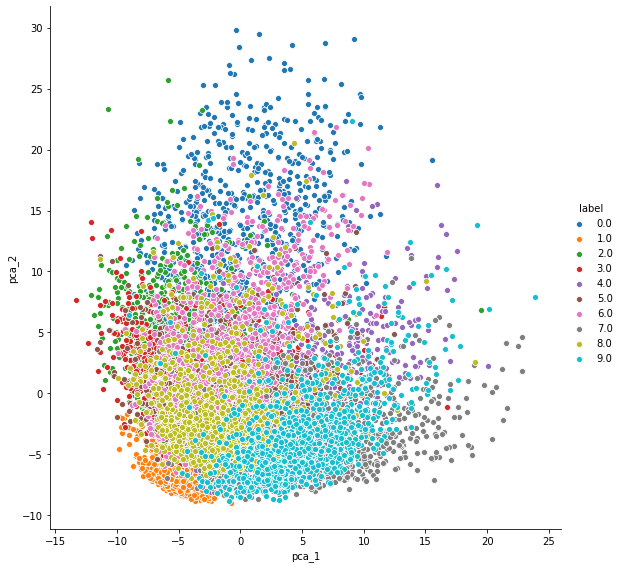

In [24]:
sns.FacetGrid(dataFrame, hue = 'label', size = 8).map(sns.scatterplot, 'pca_1','pca_2').add_legend()
plt.show()

In [70]:
# K_Means implementation
import matplotlib.pyplot as plt


class K_means_scratch:
    
    def __init__(self,clusters,epochs, plot_steps = False):
        
        self.clusters = clusters
        self.epochs = epochs
        self.plot_steps = plot_steps

        
    def k_means_algorithm(self,data):
        
        #Step 1 : Randomly choosing indices in input data for initial centroids 
        initial_centroids = np.random.choice(len(data), self.clusters, replace=False)
        # Intial_centriods for unique labels
        #initial_centroids = [0,1,2,3,4,7,8,11,18,61]

        #Step 2 : Taking data for randomly taken choosen centroid
        centroids = []
        
        for i in initial_centroids: 
            centroids.append(data[i])
        centroids = np.vstack(centroids)

        #Step 3 : Finding the euclidean distance between each data point and cluster centroids
        euclidean_distances = cdist(data, centroids ,'euclidean')
        

        #Step 4 : Choosing centroid for each data point with the minimum euclidean distance
        points = []
        for i in euclidean_distances:
            points.append(np.argmin(i))
        points = np.array(points)
        #if self.plot_steps:
          #  self.plot()
          #print(points)
        
        #Step 5 : Repeating the above steps for a defined number of epochs
        for epoch_counter in range(self.epochs): 
            updated_centroids = []
            
            for i in range(self.clusters):
                
                #Step 6 : Updating centroids by taking mean of cluster
                temp_centroid = data[points == i].mean(axis=0) 
                updated_centroids.append(temp_centroid)
                
            # Updated Centroids
            updated_centroids = np.vstack(updated_centroids) 
            img = (np.reshape(updated_centroids[9], (28, 28))).astype(np.uint8)
            plt.imshow(img, interpolation='nearest')
            
            # Euclidean distance between each data point and cluster centroids
            euclidean_distances = cdist(data, updated_centroids ,'euclidean')

            # Choosing centroid for each data point with the minimum euclidean distance
            """
            pca = PCA(n_components=2) 
            pca_transformed = pca.fit_transform(updated_centroids)
            print(pca_transformed)
            pca_df = pd.DataFrame(data = pca_transformed, columns = ['PCA 1', 'PCA 2'])
            dim = (5,5)
            fig, ax = plt.subplots(figsize=dim)
            sns.scatterplot(ax = ax,data=pca_df, x='PCA 1', y='PCA 2')
            """
            points = []
            for i in euclidean_distances:
                points.append(np.argmin(i))
            points = np.array(points)
            
            print(np.unique(points,return_counts = True))

        return points 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([ 821, 1772, 1498, 1890,  269,  542,  852,  933,  529,  894],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([ 818, 1739, 1417, 1713,  375,  729,  810,  917,  507,  975],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([ 790, 1641, 1366, 1648,  471,  871,  815,  919,  503,  976],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([ 757, 1521, 1309, 1616,  534, 1015,  842,  925,  562,  919],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([ 790, 1437, 1239, 1576,  587, 1101,  878,  930,  601,  861],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([ 805, 1386, 1202, 1569,  627, 1101,  898,  932,  636,  844],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([ 812, 1346, 1198, 1557,  668, 1113,  901,  916,  661,  828],
      dtype=int64))
(array([0, 1,

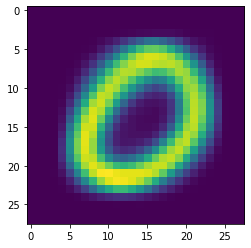

In [73]:
# for clusters in range(0,9):

    # Initiate an object of K_means class
k_means_ins = K_means_scratch(10,40,plot_steps= True)
points = k_means_ins.k_means_algorithm(data)

In [27]:
print(np.unique(points,return_counts = True))


(array([0, 1, 2, 3, 4], dtype=int64), array([ 948, 1713, 2216, 2246, 2877], dtype=int64))


In [28]:
print (cdist(([[1,2], [3,4]]), [[3,4],[1,2]], 'euclidean'))

[[2.82842712 0.        ]
 [0.         2.82842712]]


In [29]:
initial_centroids = np.random.choice(len(data), 1, replace=False)


In [30]:
print(points[:10])

[4 2 3 0 4 3 4 4 1 4]


In [31]:
x_indexs = {}

for i in range(len(points)):
    if points[i] not in x_indexs.keys():
        x_indexs[points[i]] = []
        x_indexs[points[i]].append(i)
    else:
        x_indexs[points[i]].append(i)
print (x_indexs[0])


[3, 10, 13, 25, 28, 69, 71, 101, 126, 148, 157, 183, 188, 192, 194, 215, 246, 259, 269, 271, 294, 296, 297, 305, 311, 312, 327, 352, 372, 380, 407, 424, 440, 441, 445, 459, 485, 490, 514, 525, 545, 546, 549, 561, 564, 581, 586, 592, 597, 608, 611, 620, 642, 644, 654, 656, 701, 704, 713, 721, 737, 742, 750, 763, 794, 804, 817, 821, 845, 851, 854, 871, 896, 904, 932, 939, 965, 972, 981, 993, 997, 1001, 1009, 1034, 1047, 1061, 1084, 1148, 1154, 1188, 1195, 1203, 1218, 1220, 1223, 1231, 1246, 1261, 1271, 1294, 1297, 1333, 1352, 1379, 1390, 1399, 1408, 1416, 1438, 1445, 1454, 1457, 1468, 1487, 1504, 1517, 1525, 1526, 1529, 1533, 1535, 1565, 1570, 1589, 1590, 1610, 1616, 1621, 1623, 1650, 1682, 1692, 1700, 1708, 1712, 1713, 1717, 1723, 1726, 1739, 1748, 1764, 1768, 1775, 1777, 1794, 1796, 1807, 1808, 1826, 1841, 1847, 1870, 1892, 1898, 1907, 1944, 1972, 1984, 1987, 1995, 2009, 2023, 2033, 2042, 2047, 2060, 2061, 2081, 2087, 2096, 2098, 2106, 2115, 2127, 2155, 2178, 2186, 2188, 2215, 2217, 22

In [72]:
f = []
for y_values in x_indexs[0]:
     f.append(y[y_values][0])
Elements_with_frequency = Counter(f)
print(Elements_with_frequency.most_common())

[(0, 848), (6, 28), (2, 25), (8, 13), (9, 13), (5, 11), (7, 5), (3, 4), (4, 1)]


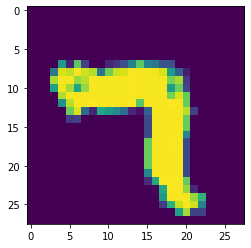

In [33]:
img = (np.reshape(data[2048], (28, 28))).astype(np.uint8)
plt.imshow(img, interpolation='nearest')

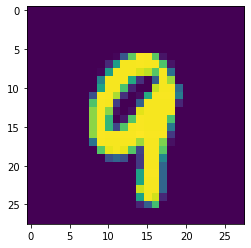

In [34]:
img = (np.reshape(data[3526], (28, 28))).astype(np.uint8)
plt.imshow(img, interpolation='nearest')